In [37]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Function to be learned - a line
### $$f(x) = \pi x + 10 $$

In [38]:
# TO DO: implement f(x) - 1 line
def f(x):
  return np.pi*x + 10

In [39]:
# TO DO: generate 100 data points in range of [-5,5] - 1 line
n = 100
x = np.linspace(-5,5, num=n)

In [40]:
x = x.reshape(1, n)
x.shape

(1, 100)

In [41]:
y = f(x)
y.shape

(1, 100)

## Our hypothesis
### $$\hat{y}(x)=wx+b$$

In [42]:
# initialize weight and bias randomly - 2 lines
w = np.random.rand(1)
b = np.random.rand(1)

In [43]:
w.shape

(1,)

In [44]:
w = w.reshape(1,1)
b = b.reshape(1,1)

In [45]:
w.shape

(1, 1)

In [46]:
def y_hat(w, b, x):
  return w*x + b

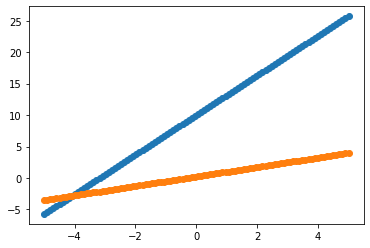

In [47]:
plt.scatter(x, y)
plt.scatter(x, y_hat(w, b, x))
plt.show()

## Loss function - Mean Squared Error
### $$L(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} \big(y_i-\hat{y_i}\big)^2 $$

In [48]:
# TO DO: implement mse - 1 to 2 lines
def mse(y, y_hat):
  return np.average((y - y_hat)**2)

## np.dot demo

In [49]:
A = np.array([[1,2,3]])
B = A

In [50]:
A.shape

(1, 3)

In [51]:
np.dot(A, B.T)

array([[14]])

In [52]:
B.T.shape

(3, 1)

In [53]:
np.dot(A.T, B)

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [54]:
A*B

array([[1, 4, 9]])

## Gradients with respect to w, b
### $$ \frac{\partial L}{\partial w} = \frac{2}{n}\sum_{i=1}^{n}\big(\hat{y_i}-y_i\big)x_i$$
### $$ \frac{\partial L}{\partial b} = \frac{2}{n}\sum_{i=1}^{n}\big(\hat{y_i}-y_i\big)$$


In [55]:
def gradients(x, y, y_hat):
  n = y.shape[1]
  grads = {}

  # TO DO: add the gradients with respect to w,b to grads - 2 lines
  grads['dw'] = (2/n)*np.dot((y_hat-y), x.T)
  grads['db'] = 2*np.average(y_hat-y)

  return grads

## Training our model - update w, b accordingly
### $$w = w - \alpha \frac{\partial L}{\partial w}$$
### $$b = b - \alpha \frac{\partial L}{\partial b}$$


In [56]:
def gradient_descent(x, y, learning_rate, w, b):
  # initialize params
  alpha = learning_rate
  losses = []

  # train model
  for i in range(100):
    # TO DO: get the predictions w, b, x using a function that we defined - 1 line
    predictions = y_hat(w, b, x)

    # TO DO: get the gradients using x, y, predictions using a function that we defined - 1 line
    grads = gradients(x, y, predictions)
    db = grads['db']
    dw = grads['dw']

    # TO DO: update w, b - 2 lines
    b -= alpha*db
    w -= alpha*dw

    # compute loss 
    loss = mse(y, predictions)
    losses.append(loss)

  return w, b, losses

In [57]:
# TO DO: run linear regression gradient_descent function; set learning_rate = 0.03 - 1 line
w, b, losses = gradient_descent(x, y, 0.03, w, b)

In [58]:
w

array([[3.14159265]])

In [59]:
b

array([[9.979936]])

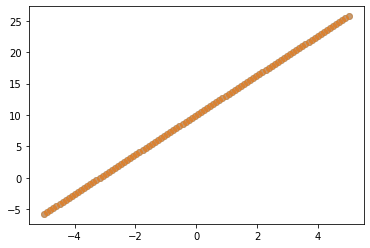

In [60]:
plt.scatter(x, y, alpha=0.5)
plt.scatter(x, y_hat(w, b, x), alpha=0.5)
plt.show()

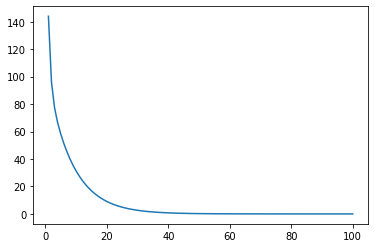

In [61]:
plt.plot(range(1, len(losses)+1), losses)

## The effect of different learning rates

In [62]:
w_small_alpha = 0
b_small_alpha = 0
w_large_alpha = 0
b_large_alpha = 0

In [63]:
w_small_alpha, b_small_alpha, losses_small_alpha = gradient_descent(x, y, 0.01, w_small_alpha, b_small_alpha)
w_large_alpha, b_large_alpha, losses_large_alpha = gradient_descent(x, y, 0.1, w_large_alpha, b_large_alpha)

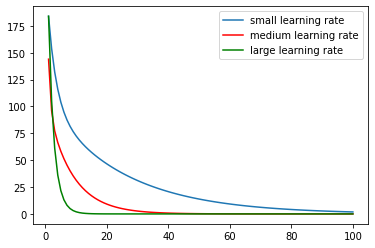

In [64]:
plt.plot(range(1, len(losses)+1), losses_small_alpha, label='small learning rate')
plt.plot(range(1, len(losses)+1), losses, label='medium learning rate', color='r')
plt.plot(range(1, len(losses)+1), losses_large_alpha, label='large learning rate', color='g')
plt.legend()

## Note: A large learning rate will cause the loss to diverge to infinity

In [72]:
w_large_alpha = 0
b_large_alpha = 0

In [73]:
w_large_alpha, b_large_alpha, losses_large_alpha = gradient_descent(x, y, 0.5, w_large_alpha, b_large_alpha)

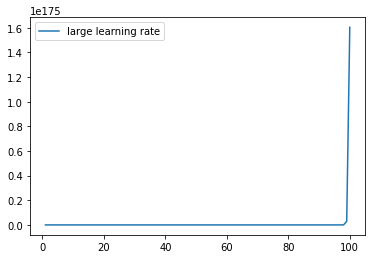

In [74]:
plt.plot(range(1, len(losses)+1), losses_large_alpha, label='large learning rate')
plt.legend()